<a href="https://colab.research.google.com/github/pspereira-92/Cancer_Diagnostic_Data_Set/blob/main/desafio01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXPLORAÇÃO, ANÁLISE E TRATAMENTO DOS DADOS: DESAFIO 01- conjunto de dados de cancro da mama (previsão benigno ou maligno)


este projeto tem como objetivo concluir o desafio 01, aplicando os algoritmos aprendidos até ao momento e decidir qual o melhor resultado para a previsão do cancro da mama.
Primeiramente vou fazer uma análise dos dados à semelhança do que foi feito no curso até agora. Posteriormente o tratamento dos dados e para finalizar analisar os difrerentes resultados escolhendo assim o algortimo com mais sucesso



In [ ]:
import numpy as np #biblioteca de matemática
import pandas as pd #biblioteca para manipular dados

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
dados = pd.read_csv('/content/drive/MyDrive/udemy/machine_learning_python/desafio01/data_cancer2.csv',
                    sep=',', encoding='iso-8859-1')
# encoding: codificação de caracteres, normalmente utiliza-se o iso-8859-1, utf-8, latin-1)

In [ ]:
dados.iloc[67:68,]


In [ ]:
dados.head()

In [ ]:
dados.tail()

In [ ]:
dados.shape
#(569 linhas, 33 colunas)

## **Análise das Variáveis (Atributos)**

### **Diagnosis = Diagnóstico**
M = malignant, B = benign

In [ ]:
dados['diagnosis'].value_counts()

In [ ]:
import seaborn as sns #biblioteca gráfica

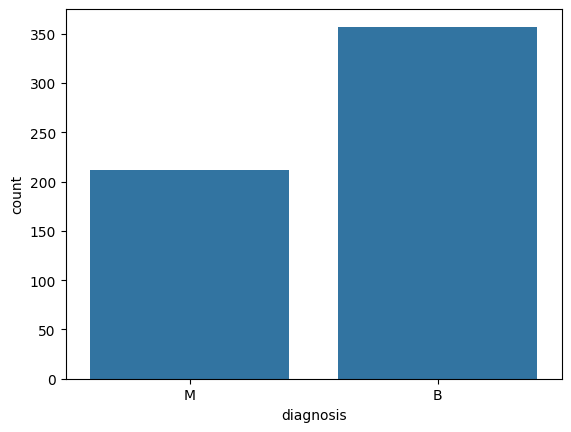

In [ ]:
sns.countplot(x='diagnosis', data=dados);

### **radius = RAIO**
(média das distâncias do centro aos pontos do perímetro)

In [ ]:
import plotly.express as px #biblioteca gráfica

In [ ]:
hist1 =  px.histogram (dados,  x = "radius_mean", nbins=60) #nbins =largura da coluna do histograma (se reduzir mt as colunas ficam > e cria grupos idd)
hist1.update_layout(width=800,height=500,title_text='raio (média das distâncias do centro aos pontos do perímetro)') #configuração layout e titulo
hist1.show()#apresentar o gráfico

### **RESUMO DE VARIÁVEIS**
deveria ser feita uma análise de igual forma para todas as colunas, mas o tempo é escasso e não é possível

### **LEGENDA DE VARIÁVEIS**
1	-	a) raio_médio (média das distâncias do centro aos pontos do perímetro)

2	-	b) textura_média (desvio padrão dos valores da escala de cinza)

3	-	c) perímetro_médio (tamanho médio do tumor central)

4	-	d) área_média

5	-	e) suavidade_média (média da variação local nos comprimentos dos raios)

6	-	f) compacidade_média (média de perímetro^2 / área - 1,0)

7	-	g) concavidade_média (média da gravidade das porções côncavas do contorno)

8	-	h) pontos côncavos_média (média para o número de porções côncavas do contorno)

9	-	i) simetria_média

10	-	j) média_de_dimensão_fractal (significa "aproximação da linha costeira" - 1)

11	-	raio_se (erro padrão para a média das distâncias do centro aos pontos do perímetro)

12	-	textura_se(erro padrão para desvio padrão de valores em escala de cinza)

13	-	perímetro_se

14	-	área_se

15	-	suavidade_se(erro padrão para variação local em comprimentos de raio)

16	-	compacidade_se(erro padrão para perímetro^2 / área - 1,0)

17	-	concavidade_se(erro padrão para gravidade de porções côncavas do contorno)

18	-	pontos côncavos_se(erro padrão para o número de porções côncavas do contorno)

19	-	simetria_se

20	-	dimensão_fractal_se(erro padrão para "aproximação da linha costeira" - 1)

21	-	raio_pior ("pior" ou maior valor médio para a média das distâncias do centro aos pontos no perímetro)

22	-	textura_pior ("pior" ou maior valor médio para desvio padrão de valores em escala de cinza)

23	-	perímetro_pior

24	-	área_pior

25	-	suavidade_pior ("pior" ou maior valor médio para variação local em comprimentos de raio)

26	-	compacidade_pior ("pior" ou maior valor médio para perímetro^2 / área - 1,0)

27	-	concavidade_pior ("pior" ou maior valor médio para a gravidade das porções côncavas do contorno)

28	-	pontos côncavos_pior ("pior" ou maior valor médio para o número de porções côncavas do contorno)

29	-	simetria_pior

30	-	dimensão_fractal_pior ("pior" ou maior valor médio para "aproximação da linha costeira" - 1)


## **Análise dos tipos de atributos.**


In [ ]:
# object: strings
# int64: inteiros
# float64: reais
# complex: complexos
dados.dtypes

,0
id,int64
diagnosis,object
radius_mean,float64
texture_mean,float64
perimeter_mean,float64
area_mean,float64
smoothness_mean,float64
compactness_mean,float64
concavity_mean,float64
concave points_mean,float64


## **Valores Missing (NAN)**

In [ ]:
# RELAÇÃO DA QUANTIDADE #verificar se existem variáveis vazias, se faltar, poderá fazer sentido tentar substituir o valor em falta
 #p/ ñ perder a linha de dados. ex: substituir por valor média
dados.isnull().sum()
#Unnamed: 32 =	569
#                   será a coluna do resultado da previsão

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


não tendo valores missing's não justifica estar a excluir valores

## **Análises Estatísticas Descritivas**

In [ ]:
dados.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [ ]:
dados.mode()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,8670,B,12.34,14.93,82.61,512.2,0.1007,0.1147,0.0,0.0,...,17.70,101.7,284.4,0.1216,0.1486,0.0,0.0,0.2226,0.07427,NaN
1,8913,NaN,NaN,15.70,87.76,NaN,NaN,0.1206,NaN,NaN,...,27.26,105.9,402.8,0.1223,0.3416,NaN,NaN,0.2369,NaN,NaN
2,8915,NaN,NaN,16.84,134.70,NaN,NaN,NaN,NaN,NaN,...,NaN,117.7,439.6,0.1234,NaN,NaN,NaN,0.2383,NaN,NaN
3,9047,NaN,NaN,16.85,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,458.0,0.1256,NaN,NaN,NaN,0.2972,NaN,NaN
4,85715,NaN,NaN,17.46,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,472.4,0.1275,NaN,NaN,NaN,0.3109,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,911157302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
565,911296201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
566,911296202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
567,911320501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###**Tratar de Valores incoerentes**

In [ ]:
dados2=dados#copia para trabalhar sobre dados

In [ ]:
#através deste comando é possível verificar quais são as colunas que têm valores 0
  #estas são as colunas que têm valores 0

#dados2["concavity_mean"].value_counts()
#dados2["concave points_mean"].value_counts()
#dados2["concavity_se"].value_counts()
#dados2["concave points_se"].value_counts()
#dados2["concavity_worst"].value_counts()
#dados2["concave points_worst"].value_counts()

#dados2.isnull().sum()

In [ ]:
dados2.shape #verificar qtd de linhas e colunas
#(569, 33)

(569, 33)

###1-concavity_mean



In [ ]:
#tratar do valor  concavity_mean
dados2.concavity_mean.value_counts()

,count
concavity_mean,
0.000000,13
0.120400,3
0.111500,2
0.033440,2
0.110300,2
...,...
0.065930,1
0.248700,1
0.287100,1


In [ ]:
dados2.concavity_mean.mean()#média de concavity, mas os 13 casos em que o valor é zero também vão contar para o calculo da média

0.0887993158172232

In [ ]:
dados2.concavity_mean.replace(0, np.NaN, inplace=True)#replace onde está o 0, NaN -> substituir por valor missing

<ipython-input-337-0a286fc5c579>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [ ]:
dados2.concavity_mean.value_counts()

,count
concavity_mean,
0.120400,3
0.111500,2
0.033440,2
0.110300,2
0.108500,2
...,...
0.065930,1
0.248700,1
0.287100,1


In [ ]:
dados2.isnull().sum() #já aparece os valores missing no concavity_mean = 13

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,13
concave points_mean,0


In [ ]:
dados2.concavity_mean.mean()
#a média já é diferente
#a análise feita antes tinha o resultado 0.0887993158172232 pois englobava os valores zero
#a média agora é 0.09087555881294963 (pois n contempla os valores missing)

0.09087555881294963

In [ ]:
# SUBSTITUIR OS VALORES MISSING PELA MÉDIA
dados2['concavity_mean'].fillna(dados2['concavity_mean'].mean(), inplace=True)

<ipython-input-341-773577593792>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [ ]:
dados2.isnull().sum()#já n apresenta valores missing na variavel concavity_mean

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [ ]:
dados2.concavity_mean.mean()
#valor média antes 0.09087555881294963
#valor média agora 0.09087555881294965

0.09087555881294965

###2-concave points_mean

In [ ]:
dados["concave points_mean"].mean()

0.04891914586994728

In [ ]:
dados2["concave points_mean"].replace(0, np.NaN, inplace=True)#replace onde está o 0, NaN -> substituir por valor missing # SUBSTITUIR OS VALORES MISSING PELA MÉDIA
dados2["concave points_mean"].fillna(dados2["concave points_mean"].mean(), inplace=True)# SUBSTITUIR OS VALORES MISSING PELA MÉDIA
#média antes  0.04891914586994728
#média depois 0.05006293884892086

<ipython-input-345-4a3582bf7c7f>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-345-4a3582bf7c7f>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or d

###3-concavity_se

In [ ]:
dados2["concavity_se"].mean()

0.03189371634446397

In [ ]:
dados2["concavity_se"].replace(0, np.NaN, inplace=True)#replace onde está o 0, NaN -> substituir por valor missing # SUBSTITUIR OS VALORES MISSING PELA MÉDIA
dados2["concavity_se"].fillna(dados2["concavity_se"].mean(), inplace=True)# SUBSTITUIR OS VALORES MISSING PELA MÉDIA
#antes  0.03189371634446397
#depois 0.03263943273381295

<ipython-input-347-aec2538e8930>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-347-aec2538e8930>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or d

###4-concave points_se

In [ ]:
dados2["concave points_se"].replace(0, np.NaN, inplace=True)#replace onde está o 0, NaN -> substituir por valor missing # SUBSTITUIR OS VALORES MISSING PELA MÉDIA
dados2["concave points_se"].fillna(dados2["concave points_se"].mean(), inplace=True)# SUBSTITUIR OS VALORES MISSING PELA MÉDIA
#antes  0.011796137082601054
#depois 0.012071946043165468

<ipython-input-348-3518c4e0a362>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-348-3518c4e0a362>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or d

###5-concavity_worst

In [ ]:
dados2["concavity_worst"].replace(0, np.NaN, inplace=True)#replace onde está o 0, NaN -> substituir por valor missing # SUBSTITUIR OS VALORES MISSING PELA MÉDIA
dados2["concavity_worst"].fillna(dados2["concavity_worst"].mean(), inplace=True)# SUBSTITUIR OS VALORES MISSING PELA MÉDIA
#antes  0.27218848330404216
#depois 0.2785526025179856

<ipython-input-349-48b67169c5cc>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-349-48b67169c5cc>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or d

###6-concave points_worst

In [ ]:
dados2["concave points_worst"].replace(0, np.NaN, inplace=True)#replace onde está o 0, NaN -> substituir por valor missing # SUBSTITUIR OS VALORES MISSING PELA MÉDIA
dados2["concave points_worst"].fillna(dados2["concavity_worst"].mean(), inplace=True)# SUBSTITUIR OS VALORES MISSING PELA MÉDIA
#antes  0.11460622319859401
#depois 0.12097034241253748

<ipython-input-350-fcff6e2ad24b>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-350-fcff6e2ad24b>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or d

In [ ]:
dados2.isnull().sum()#confirmar se existem variáveis com valores missing

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [ ]:
dados.describe()
#já sem valores os valores a zero

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.090876,0.050063,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.278553,0.120970,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.078553,0.038074,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.204423,0.067784,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000692,0.001852,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.001845,0.008772,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.031360,0.021070,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.124200,0.066960,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.066640,0.037000,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.241300,0.104700,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.170800,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


## **Análise dos tipos de atributos.**

In [ ]:
# object: strings
# int64: inteiros
# float64: reais
# complex: complexos
dados.dtypes

,0
id,int64
diagnosis,object
radius_mean,float64
texture_mean,float64
perimeter_mean,float64
area_mean,float64
smoothness_mean,float64
compactness_mean,float64
concavity_mean,float64
concave points_mean,float64


### **Análise de Outliers**

In [ ]:
px.box(dados2, y='radius_mean')

In [ ]:
px.box(dados2, y='texture_mean')

In [ ]:
px.box(dados2, y='perimeter_mean')

In [ ]:
px.box(dados2, y='area_mean')

In [ ]:
px.box(dados2, y='smoothness_mean')

In [ ]:
px.box(dados2, y='compactness_mean')

In [ ]:
px.box(dados2, y='concavity_mean')

repetir processo



## **Salvar (Exportar) o Dataframe processado**

In [ ]:
import datetime # para importar toda a biblioteca


In [ ]:
dados2.to_csv(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")+'_cópia_segurança_cancer_BD.csv', sep=';', encoding='utf-8', index = False)#gravar excel, sep -> separação. index se n colocar, ele vai aparecer as colunas com uma numeração e n queremos isso
dados2.to_csv('data_cancer2_tratado.csv', sep=';', encoding='utf-8', index = False)#gravar excel, sep -> separação. index se n colocar, ele vai aparecer as colunas com uma numeração e n queremos isso

#**Abrir projeto**

##PRÉ-PROCESSAMENTO

In [364]:
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/udemy/machine_learning_python/desafio01/data_cancer2_tratado.csv',
                    sep=';', encoding='utf-8')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Transformando as variáveis categóricas nominais em variáveis categóricas ordinais**

In [365]:
df2 = pd.DataFrame.copy(df)# df2 vai ser uma cópia do df


In [366]:
df2.dtypes
#diagnosis = object

,0
id,int64
diagnosis,object
radius_mean,float64
texture_mean,float64
perimeter_mean,float64
area_mean,float64
smoothness_mean,float64
compactness_mean,float64
concavity_mean,float64
concave points_mean,float64


In [367]:
df2.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [368]:
df2['diagnosis'].replace({'M':0, 'B': 1}, inplace=True)#substitui M da coluna diagnosis por 0 e F por 1


<ipython-input-368-960f96c4bc58>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-368-960f96c4bc58>:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [369]:
df2.dtypes
#diagnosis - int64

,0
id,int64
diagnosis,int64
radius_mean,float64
texture_mean,float64
perimeter_mean,float64
area_mean,float64
smoothness_mean,float64
compactness_mean,float64
concavity_mean,float64
concave points_mean,float64


In [370]:
df2.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


##**LEGENDA**
1 - a) raio_médio (média das distâncias do centro aos pontos do perímetro)

2 - b) textura_média (desvio padrão dos valores da escala de cinza)

3 - c) perímetro_médio (tamanho médio do tumor central)

4 - d) área_média

5 - e) suavidade_média (média da variação local nos comprimentos dos raios)

6 - f) compacidade_média (média de perímetro^2 / área - 1,0)

7 - g) concavidade_média (média da gravidade das porções côncavas do contorno)

8 - h) pontos côncavos_média (média para o número de porções côncavas do contorno)

9 - i) simetria_média

10 - j) média_de_dimensão_fractal (significa "aproximação da linha costeira" - 1)

11 - raio_se (erro padrão para a média das distâncias do centro aos pontos do perímetro)

12 - textura_se(erro padrão para desvio padrão de valores em escala de cinza)

13 - perímetro_se

14 - área_se

15 - suavidade_se(erro padrão para variação local em comprimentos de raio)

16 - compacidade_se(erro padrão para perímetro^2 / área - 1,0)

17 - concavidade_se(erro padrão para gravidade de porções côncavas do contorno)

18 - pontos côncavos_se(erro padrão para o número de porções côncavas do contorno)

19 - simetria_se

20 - dimensão_fractal_se(erro padrão para "aproximação da linha costeira" - 1)

21 - raio_pior ("pior" ou maior valor médio para a média das distâncias do centro aos pontos no perímetro)

22 - textura_pior ("pior" ou maior valor médio para desvio padrão de valores em escala de cinza)

23 - perímetro_pior

24 - área_pior

25 - suavidade_pior ("pior" ou maior valor médio para variação local em comprimentos de raio)

26 - compacidade_pior ("pior" ou maior valor médio para perímetro^2 / área - 1,0)

27 - concavidade_pior ("pior" ou maior valor médio para a gravidade das porções côncavas do contorno)

28 - pontos côncavos_pior ("pior" ou maior valor médio para o número de porções côncavas do contorno)

29 - simetria_pior

30 - dimensão_fractal_pior ("pior" ou maior valor médio para "aproximação da linha costeira" - 1)

## **ATRIBUTOS PREVISORES E ALVO**

> Adicionar blockquote



**PREVISORES**

*   radius_mean
*   texture_mean
*   perimeter_mean
*   area_mean
*   smoothness_mean
*   compactness_mean
*   concavity_mean
*   concave points_mean
*   symmetry_mean
*   fractal_dimension_mean

**ALVO**

*   diagnosis

In [371]:
df2.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [372]:
previsores = df2.iloc[:,2:12].values#Excluí a primeira coluna(id), a 2ª que é o alvo e a da fractal_dimension_mean para a frente q n interessa

In [373]:
previsores

array([[1.79900000e+01, 1.03800000e+01, 1.22800000e+02, ...,
        1.47100000e-01, 2.41900000e-01, 7.87100000e-02],
       [2.05700000e+01, 1.77700000e+01, 1.32900000e+02, ...,
        7.01700000e-02, 1.81200000e-01, 5.66700000e-02],
       [1.96900000e+01, 2.12500000e+01, 1.30000000e+02, ...,
        1.27900000e-01, 2.06900000e-01, 5.99900000e-02],
       ...,
       [1.66000000e+01, 2.80800000e+01, 1.08300000e+02, ...,
        5.30200000e-02, 1.59000000e-01, 5.64800000e-02],
       [2.06000000e+01, 2.93300000e+01, 1.40100000e+02, ...,
        1.52000000e-01, 2.39700000e-01, 7.01600000e-02],
       [7.76000000e+00, 2.45400000e+01, 4.79200000e+01, ...,
        5.00629388e-02, 1.58700000e-01, 5.88400000e-02]])

In [374]:
df2.shape
#(569, 33)

(569, 33)

In [375]:
previsores.shape
#(569, 10) -23 colunas

(569, 10)

In [376]:
df2.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [377]:
alvo = df2.iloc[:,1].values #definição do nosso alvo   'variável diagnosis'
#no entanto não foi colocado intervalo, então ele não separa por [], **!!CUIDADO!!**

In [378]:
alvo

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [379]:
alvo.shape
#(569,)

(569,)

## **Análise das escalas dos atributos (Escalonamento)**

In [380]:
df2.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,0.627417,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.090876,0.050063,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.278553,0.120970,0.290076,0.083946,NaN
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.078553,0.038074,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.204423,0.067784,0.061867,0.018061,NaN
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000692,0.001852,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.001845,0.008772,0.156500,0.055040,NaN
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.031360,0.021070,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.124200,0.066960,0.250400,0.071460,NaN
50%,9.060240e+05,1.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.066640,0.037000,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.241300,0.104700,0.282200,0.080040,NaN
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.170800,0.317900,0.092080,NaN
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


*   VAMOS UTILIZAR O PRIMEIRO

***Padronização (utiliza a média e o desvio padrão como referência). ***

Normalização (utiliza os valores máximo e mínimo como referência).

In [381]:
from sklearn.preprocessing import StandardScaler#escalda de padronização

In [382]:
previsores_esc = StandardScaler().fit_transform(previsores)

In [383]:
previsores_esc

array([[ 1.09706398e+00, -2.07333501e+00,  1.26993369e+00, ...,
         2.55090438e+00,  2.21751501e+00,  2.25574689e+00],
       [ 1.82982061e+00, -3.53632408e-01,  1.68595471e+00, ...,
         5.28573204e-01,  1.39236330e-03, -8.68652457e-01],
       [ 1.57988811e+00,  4.56186952e-01,  1.56650313e+00, ...,
         2.04617594e+00,  9.39684817e-01, -3.98007910e-01],
       ...,
       [ 7.02284249e-01,  2.04557380e+00,  6.72675785e-01, ...,
         7.77350442e-02, -8.09117071e-01, -8.95586935e-01],
       [ 1.83834103e+00,  2.33645719e+00,  1.98252415e+00, ...,
         2.67971528e+00,  2.13719425e+00,  1.04369542e+00],
       [-1.80840125e+00,  1.22179204e+00, -1.81438851e+00, ...,
        -1.45927378e-15, -8.20069901e-01, -5.61032377e-01]])

In [384]:
previsoresdf = pd.DataFrame(previsores_esc)
previsoresdf

,0,1,2,3,4,5,6,7,8,9
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.665829e+00,2.550904e+00,2.217515,2.255747
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-5.065450e-02,5.285732e-01,0.001392,-0.868652
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.357279e+00,2.046176e+00,0.939685,-0.398008
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.917904e+00,1.449440e+00,2.867383,4.910919
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.364924e+00,1.425781e+00,-0.009560,-0.562450
...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.949758e+00,2.335343e+00,-0.312589,-0.931027
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,6.768840e-01,1.257801e+00,-0.217664,-1.058611
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,2.082520e-02,7.773504e-02,-0.809117,-0.895587
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.319467e+00,2.679715e+00,2.137194,1.043695


In [385]:
previsoresdf.describe()

,0,1,2,3,4,5,6,7,8,9
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-1.373633e-16,6.868164e-17,-1.248757e-16,-2.185325e-16,-8.366672e-16,1.873136e-16,-8.741299e-17,9.990056e-17,1.748260e-16,4.745277e-16
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.149072e+00,-1.267366e+00,-2.744117e+00,-1.819865e+00
25%,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.583163e-01,-7.621646e-01,-7.032397e-01,-7.226392e-01
50%,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.087969e-01,-3.433977e-01,-7.162650e-02,-1.782793e-01
75%,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.074223e-01,6.292560e-01,5.307792e-01,4.709834e-01
max,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.280175e+00,3.973082e+00,4.484751e+00,4.910919e+00


## **RESUMO PRÉ-PROCESSAMENTO**

alvo = variável que se pretende atingir (cancro M ou B).

previsores = conjunto de variáveis previsoras com as variáveis categóricas transformadas em numéricas manualmente, sem escalonar.

previsores_esc = conjunto de variáveis previsoras com as variáveis categóricas transformadas em numéricas, escalonada.

## **BASE DE TREINO E TESTE**

In [386]:
from sklearn.model_selection import train_test_split

Parâmetros train_test_split:

arrays: nomes dos atributos previsores e alvo.
test_size: tamanho em porcentagem dos dados de teste. default é none.
train_size: tamanho em porcentagem dos dados de treinamento.default é none.
random_state: nomeação de um estado aleatório.
shuffle: embaralhamento dos dados aleatórios. Associado com o random_state ocorre o mesmo embaralhamento sempre. Default é True.
stratify: Possibilidade de dividir os dados de forma estratificada. Default é None (nesse caso é mantido a proporção, isto é, se tem 30% de zeros e 70% de 1 no dataframe, na separação em treinamento e teste se manterá essa proporção).

In [387]:
x_treino, x_teste, y_treino, y_teste = train_test_split(previsores, alvo, test_size = 0.3, random_state = 0)
#testar previsores(tem que ser array).
#nome do nossa atributo alvo
#tamanho do teste, neste caso 30% (para o tamanho de treino é atribuido automáticamente de 70%)

In [388]:
x_treino.shape

(398, 10)

In [389]:
x_teste.shape

(171, 10)

In [390]:
y_treino.shape

(398,)

In [391]:
y_teste.shape

(171,)

# **NAIVE BAYES**
Treinamento do algoritmo

In [392]:
from sklearn.naive_bayes import GaussianNB

In [393]:
naive = GaussianNB()
naive.fit(x_treino, y_treino)
#vai aprender com base no treino

GaussianNB()

In [394]:
previsoes_naive = naive.predict(x_teste)
previsoes_naive

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1])

In [395]:
y_teste

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1])

In [396]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [397]:
accuracy_score(y_teste, previsoes_naive)

0.9005847953216374

In [398]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_naive) * 100.0))

Acurácia: 90.06%


In [399]:
confusion_matrix(y_teste, previsoes_naive)

array([[ 54,   9],
       [  8, 100]])

In [400]:
print(classification_report(y_teste, previsoes_naive))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86        63
           1       0.92      0.93      0.92       108

    accuracy                           0.90       171
   macro avg       0.89      0.89      0.89       171
weighted avg       0.90      0.90      0.90       171



# **Análise dados de treino**

In [401]:
previsoes_treino = naive.predict(x_treino)
previsoes_treino

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,

In [402]:
accuracy_score(y_treino, previsoes_treino)

0.9195979899497487

In [403]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_naive) * 100.0))

Acurácia: 90.06%


In [404]:
confusion_matrix(y_treino, previsoes_treino)

array([[127,  22],
       [ 10, 239]])

### **Validação Cruzada**

In [405]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [406]:
# Separando os dados em folds
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)#criar 30 grupos e mantém o mesmo grupo para termos uma referência de comparação

In [407]:
# Criando o modelo
modelo = GaussianNB()
resultado = cross_val_score(modelo, previsores, alvo, cv = kfold)
resultado

array([0.89473684, 0.84210526, 1.        , 0.94736842, 0.94736842,
       0.94736842, 0.94736842, 0.89473684, 0.94736842, 0.89473684,
       0.94736842, 1.        , 0.94736842, 0.84210526, 0.84210526,
       0.94736842, 0.89473684, 0.89473684, 0.94736842, 0.94736842,
       0.94736842, 0.73684211, 0.89473684, 0.94736842, 1.        ,
       0.84210526, 0.78947368, 0.94736842, 0.89473684, 0.77777778])

In [408]:
# Usamos a média e o desvio padrão
print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0))

Acurácia Média: 90.84%


Naive Bayes = 90.06% (teste) - 154 acertos e 90.84% (validação cruzada) - previsores


# **MÁQUINAS DE VETORES DE SUPORTE (SVM)**

In [409]:
from sklearn.svm import SVC

In [410]:
svm = SVC(kernel='rbf', random_state=1, C = 2)
svm.fit(x_treino, y_treino)

SVC(C=2, random_state=1)

In [411]:
previsoes_svm = svm.predict(x_teste)
previsoes_svm

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1])

In [412]:
y_teste

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1])

In [413]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [414]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_svm) * 100.0))

Acurácia: 88.89%


In [415]:
confusion_matrix(y_teste, previsoes_svm)

array([[ 46,  17],
       [  2, 106]])

In [416]:
print(classification_report(y_teste, previsoes_svm))

              precision    recall  f1-score   support

           0       0.96      0.73      0.83        63
           1       0.86      0.98      0.92       108

    accuracy                           0.89       171
   macro avg       0.91      0.86      0.87       171
weighted avg       0.90      0.89      0.88       171



**Análise dados de treino**

In [417]:
previsoes_treino = svm.predict(x_treino)
previsoes_treino

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,

In [418]:
accuracy_score(y_treino, previsoes_treino)

0.8668341708542714

In [419]:
confusion_matrix(y_treino, previsoes_treino)

array([[102,  47],
       [  6, 243]])

### **Validação Cruzada**

In [420]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [421]:
# Separando os dados em folds
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)

In [422]:
# Criando o modelo
modelo = SVC(kernel='rbf', random_state=1, C = 2)
resultado = cross_val_score(modelo, previsores, alvo, cv = kfold)

# Usamos a média e o desvio padrão
print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0))

Acurácia Média: 89.07%


Naive Bayes = 90.06% (teste) - 154 acertos e 90.84% (validação cruzada) - previsores

SVM = 88.89% - 152 acertos e 89.07% (validação cruzada) : previsores- SVC(kernel='rbf', random_state=1, C = 2)




# **REGRESSÃO LOGÍSTICA**


In [423]:
from sklearn.linear_model import LogisticRegression

In [424]:
logistica = LogisticRegression(random_state=1, max_iter=600, penalty="l2",
                               tol=0.0001, C=1,solver="lbfgs")
logistica.fit(x_treino, y_treino)

LogisticRegression(C=1, max_iter=600, random_state=1)

In [425]:
logistica.intercept_

array([25.3968419])

In [426]:
logistica.coef_

array([[ 2.42834719, -0.21906288, -0.67354144,  0.01174774, -0.35861637,
        -0.69190779, -1.16374822, -0.58085471, -0.54218282, -0.10312686]])

In [427]:
previsoes_logistica = logistica.predict(x_teste)
previsoes_logistica

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1])

In [428]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [429]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_logistica) * 100.0))

Acurácia: 91.23%


In [430]:
confusion_matrix(y_teste, previsoes_logistica)

array([[57,  6],
       [ 9, 99]])

In [431]:
print(classification_report(y_teste, previsoes_logistica))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88        63
           1       0.94      0.92      0.93       108

    accuracy                           0.91       171
   macro avg       0.90      0.91      0.91       171
weighted avg       0.91      0.91      0.91       171



**Análise dados de treino**

In [432]:
previsoes_treino = logistica.predict(x_treino)
previsoes_treino

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,

In [433]:
accuracy_score(y_treino, previsoes_treino)

0.9170854271356784

In [434]:
confusion_matrix(y_treino, previsoes_treino)

array([[127,  22],
       [ 11, 238]])

### **Validação Cruzada**

In [435]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [436]:
# Separando os dados em folds
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)

In [437]:
# Criando o modelo
modelo = LogisticRegression(random_state=1, max_iter=600, penalty="l2",
                               tol=0.0001, C=1,solver="lbfgs")
resultado = cross_val_score(modelo, previsores, alvo, cv = kfold)

# Usamos a média e o desvio padrão
print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0))

Acurácia Média: 91.01%


Naive Bayes = 90.06% (teste) - 154 acertos e 90.84% (validação cruzada) - previsores

SVM = 88.89% - 152 acertos e 89.07% (validação cruzada) : previsores- SVC(kernel='rbf', random_state=1, C = 2)

Regressão logística = 91.23% -  156 acertos e % 91.01%(validação cruzada) : LogisticRegression(random_state=1, max_iter=600, penalty="l2",
                               tol=0.0001, C=1,solver="lbfgs")

# **APRENDIZAGEM BASEADA EM INSTÂNCIAS (KNN)**

In [438]:
from sklearn.neighbors import KNeighborsClassifier

In [439]:
knn = KNeighborsClassifier(n_neighbors=7, metric='minkowski', p=1)#PREFERENCIALMENTE TRABALHAR SMP C/ NÚMEROS IMPARES n_neighbors
knn.fit(x_treino, y_treino)

KNeighborsClassifier(n_neighbors=7, p=1)

In [440]:
previsoes_knn = knn.predict(x_teste)
previsoes_knn

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1])

In [441]:
y_teste

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1])

In [442]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [443]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_knn) * 100.0))

Acurácia: 88.89%


In [444]:
confusion_matrix(y_teste, previsoes_knn)

array([[ 52,  11],
       [  8, 100]])

In [445]:
print(classification_report(y_teste, previsoes_knn))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85        63
           1       0.90      0.93      0.91       108

    accuracy                           0.89       171
   macro avg       0.88      0.88      0.88       171
weighted avg       0.89      0.89      0.89       171



In [446]:
previsoes_treino = knn.predict(x_treino)
previsoes_treino

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,

In [447]:
accuracy_score(y_treino, previsoes_treino)

0.8969849246231156

In [448]:
confusion_matrix(y_treino, previsoes_treino)

array([[121,  28],
       [ 13, 236]])

### **Validação Cruzada**

In [449]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [450]:
# Separando os dados em folds
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)

In [451]:
# Criando o modelo
modelo = KNeighborsClassifier(n_neighbors=7, metric='minkowski', p = 1)
resultado = cross_val_score(modelo, previsores, alvo, cv = kfold)

# Usamos a média e o desvio padrão
print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0))

Acurácia Média: 88.73%


Naive Bayes = 90.06% (teste) - 154 acertos e 90.84% (validação cruzada) - previsores

SVM = 88.89% - 152 acertos e 89.07% (validação cruzada) : previsores- SVC(kernel='rbf', random_state=1, C = 2)

Regressão logística = 91.23% - 156 acertos e % 91.01%(validação cruzada) : LogisticRegression(random_state=1, max_iter=600, penalty="l2", tol=0.0001, C=1,solver="lbfgs")

KNN = 88.89%- 152 acertos e  88.73% (validação cruzada) : KNeighborsClassifier(n_neighbors=7, metric='minkowski', p=1)


# **ÁRVORE DE DECISÃO**

In [452]:
from sklearn.tree import DecisionTreeClassifier

In [453]:
arvore = DecisionTreeClassifier(criterion='entropy', random_state = 0, max_depth=3)
arvore.fit(x_treino, y_treino)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [454]:
previsoes_arvore = arvore.predict(x_teste)
previsoes_arvore

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1])

In [455]:
y_teste

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1])

In [456]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [457]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_arvore) * 100.0))

Acurácia: 91.81%


In [458]:
confusion_matrix(y_teste, previsoes_arvore)

array([[ 56,   7],
       [  7, 101]])

In [459]:
print(classification_report(y_teste, previsoes_arvore))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        63
           1       0.94      0.94      0.94       108

    accuracy                           0.92       171
   macro avg       0.91      0.91      0.91       171
weighted avg       0.92      0.92      0.92       171



**Análise dados de treino**

In [460]:
previsoes_treino = arvore.predict(x_treino)
previsoes_treino

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,

In [461]:
accuracy_score(y_treino, previsoes_treino)

0.9547738693467337

In [462]:
confusion_matrix(y_treino, previsoes_treino)

array([[138,  11],
       [  7, 242]])

### **Validação Cruzada**

In [463]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [464]:
# Separando os dados em folds
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)

In [465]:
# Criando o modelo
modelo = DecisionTreeClassifier(criterion='entropy', random_state = 0, max_depth=3)
resultado = cross_val_score(modelo, previsores, alvo, cv = kfold)

# Usamos a média e o desvio padrão
print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0))

Acurácia Média: 89.27%


Naive Bayes = 90.06% (teste) - 154 acertos e 90.84% (validação cruzada) - previsores

SVM = 88.89% - 152 acertos e 89.07% (validação cruzada) : previsores- SVC(kernel='rbf', random_state=1, C = 2)

Regressão logística = 91.23% - 156 acertos e % 91.01%(validação cruzada) : LogisticRegression(random_state=1, max_iter=600, penalty="l2", tol=0.0001, C=1,solver="lbfgs")

KNN = 88.89%- 152 acertos e 88.73% (validação cruzada) : KNeighborsClassifier(n_neighbors=7, metric='minkowski', p=1)

Árvore de decisão = 91.81% (treino) - 157 acertos e 89.27% (validação cruzada):DecisionTreeClassifier(criterion='entropy', random_state = 0, max_depth=3)
arvore.fit(x_treino, y_treino)

# **RANDOM FOREST**

In [466]:
from sklearn.ensemble import RandomForestClassifier

In [467]:
random = RandomForestClassifier(n_estimators=150, criterion='entropy', random_state = 0, max_depth=4)
random.fit(x_treino, y_treino)

RandomForestClassifier(criterion='entropy', max_depth=4, n_estimators=150,
                       random_state=0)

In [468]:
previsoes_random = random.predict(x_teste)
previsoes_random

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1])

In [469]:
y_teste

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1])

In [470]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [471]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_random) * 100.0))

Acurácia: 93.57%


In [472]:
confusion_matrix(y_teste, previsoes_random)

array([[ 59,   4],
       [  7, 101]])

In [473]:
print(classification_report(y_teste, previsoes_random))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91        63
           1       0.96      0.94      0.95       108

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.93       171
weighted avg       0.94      0.94      0.94       171



**Análise dados de treino**

In [474]:
previsoes_treino = random.predict(x_treino)
previsoes_treino

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,

In [475]:
accuracy_score(y_treino, previsoes_treino)

0.9698492462311558

In [476]:
confusion_matrix(y_treino, previsoes_treino)

array([[141,   8],
       [  4, 245]])



```
# Isto está formatado como código
```

### **Validação Cruzada**

In [477]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [478]:
# Separando os dados em folds
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)

In [479]:
# Criando o modelo
modelo = RandomForestClassifier(n_estimators=150, criterion='entropy', random_state = 0, max_depth=4)
resultado = cross_val_score(modelo, previsores, alvo, cv = kfold)

# Usamos a média e o desvio padrão
print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0))

Acurácia Média: 92.94%


Naive Bayes = 90.06% (teste) - 154 acertos e 90.84% (validação cruzada) - previsores

SVM = 88.89% - 152 acertos e 89.07% (validação cruzada) : previsores- SVC(kernel='rbf', random_state=1, C = 2)

Regressão logística = 91.23% - 156 acertos e % 91.01%(validação cruzada) : LogisticRegression(random_state=1, max_iter=600, penalty="l2", tol=0.0001, C=1,solver="lbfgs")

KNN = 88.89%- 152 acertos e 88.73% (validação cruzada) : KNeighborsClassifier(n_neighbors=7, metric='minkowski', p=1)

Árvore de decisão = 91.81% (treino) - 157 acertos e 89.27% (validação cruzada):DecisionTreeClassifier(criterion='entropy', random_state = 0, max_depth=3) arvore.fit(x_treino, y_treino)

Random Forest = 93.57% - 160 acertos e 92.94% (validação cruzada) : RandomForestClassifier(n_estimators=150, criterion='entropy', random_state = 0, max_depth=4)
random.fit(x_treino, y_treino)

# **XGBOOST**

In [480]:
from xgboost import XGBClassifier

In [481]:
xg = XGBClassifier(max_depth=2, learning_rate=0.05, n_estimators=250, objective='binary:logistic', random_state=3)


In [482]:
xg.fit(x_treino,y_treino)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning:

The XGBClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.



AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=250, n_jobs=None,
              num_parallel_tree=None, random_state=3, ...)

In [483]:
previsoes_xg = xg.predict(x_teste)
previsoes_xg

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1])

In [484]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [485]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_xg) * 100.0))

Acurácia: 93.57%


In [486]:
confusion_matrix(y_teste, previsoes_xg)

array([[ 57,   6],
       [  5, 103]])

In [487]:
print(classification_report(y_teste, previsoes_xg))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91        63
           1       0.94      0.95      0.95       108

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



**Análise dados de treino**

In [488]:
previsoes_treino = xg.predict(x_treino)
previsoes_treino

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,

In [489]:
accuracy_score(y_treino, previsoes_treino)

0.9899497487437185

In [490]:
confusion_matrix(y_treino, previsoes_treino)

array([[146,   3],
       [  1, 248]])

### **Validação Cruzada**

In [491]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [492]:
# Separando os dados em folds
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)

In [493]:
# Criando o modelo
modelo = XGBClassifier(max_depth=2, learning_rate=0.05, n_estimators=250, objective='binary:logistic', random_state=3)
resultado = cross_val_score(modelo, previsores, alvo, cv = kfold)

# Usamos a média e o desvio padrão
print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning:

The XGBClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.



AttributeError: 'super' object has no attribute '__sklearn_tags__'

# **LIGHTGBM**

In [494]:
# Instalação do Algoritmo
!pip install lightgbm

In [495]:
import lightgbm as lgb

In [496]:
# Dataset para treino
dataset = lgb.Dataset(x_treino,label=y_treino)

Hiperparâmetros

Controle de ajuste

num_leaves : define o número de folhas a serem formadas em uma árvore. Não tem uma relação direta entre num_leaves e max_depth e, portanto, os dois não devem estar vinculados um ao outro.

max_depth : especifica a profundidade máxima ou nível até o qual a árvore pode crescer.

Controle de velocidade

learning_rate: taxa de aprendizagem, determina o impacto de cada árvore no resultado final.

max_bin : O valor menor de max_bin reduz muito tempo de procesamento, pois agrupa os valores do recurso em caixas discretas, o que é computacionalmente mais barato.

Controle de precisão

num_leaves : valor alto produz árvores mais profundas com maior precisão, mas leva ao overfitting.

max_bin : valores altos tem efeito semelhante ao causado pelo aumento do valor de num_leaves e também torna mais lento o procedimento de treinamento.

In [497]:
# Parâmetros
parametros = {'num_leaves':250, # número de folhas
              'objective':'binary', # classificação Binária
              'max_depth':2,
              'learning_rate':.05,
              'max_bin':100}
# Criar um dicionário de parametros

In [ ]:
lgbm=lgb.train(parametros,dataset,num_boost_round=200)

In [ ]:
# Marcação do tempo de execução
from datetime import datetime
inicio=datetime.now()
lgbm=lgb.train(parametros,dataset)
fim=datetime.now()

tempo = fim - inicio
tempo

In [ ]:
previsoes_lgbm = lgbm.predict(x_teste)
previsoes_lgbm
#ao verificar os valores, é possível observar que não são inteiros, será [0,qualquer coisa], então para classificar se é 0 ou 1,
#temos de fazer um if para atribuir o o valor

In [501]:
previsoes_lgbm.shape

(171,)

In [502]:
# Quando for menor que 5 considera 0 e quando for maior ou igual a 5 considera 1
for i in range(0, 171):
    if previsoes_lgbm[i] >= .5:
       previsoes_lgbm[i] = 1
    else:
       previsoes_lgbm[i] = 0

In [503]:
previsoes_lgbm

array([0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1.,
       1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1.,
       1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1.,
       1.])

In [504]:
y_teste

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1])

In [505]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [506]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_lgbm) * 100.0))

Acurácia: 92.40%


In [507]:
confusion_matrix(y_teste, previsoes_lgbm)

array([[ 56,   7],
       [  6, 102]])

**Análise dados de treino**

In [ ]:
previsoes_treino = lgbm.predict(x_treino)
previsoes_treino

In [509]:
previsoes_treino.shape

(398,)

In [510]:
# Quando for menor que 5 considera 0 e quando for maior ou igual a 5 considera 1
for i in range(0, 398):
    if previsoes_treino[i] >= .5:
       previsoes_treino[i] = 1
    else:
       previsoes_treino[i] = 0

In [ ]:
previsoes_treino

In [512]:
accuracy_score(y_treino, previsoes_treino)

0.9748743718592965

In [513]:
confusion_matrix(y_treino, previsoes_treino)

array([[142,   7],
       [  3, 246]])

### **Validação Cruzada**

In [515]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [516]:
# Separando os dados em folds
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)

In [ ]:
# Criando o modelo
modelo = lgb.LGBMClassifier(num_leaves = 250, objective = 'binary',
                            max_depth = 2, learning_rate = .05, max_bin =100)
resultado = cross_val_score(modelo, previsores, alvo, cv = kfold)

# Usamos a média e o desvio padrão
print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0))

Naive Bayes = 90.06% (teste) - 154 acertos e 90.84% (validação cruzada) - previsores

SVM = 88.89% - 152 acertos e 89.07% (validação cruzada) : previsores- SVC(kernel='rbf', random_state=1, C = 2)

Regressão logística = 91.23% - 156 acertos e % 91.01%(validação cruzada) : LogisticRegression(random_state=1, max_iter=600, penalty="l2", tol=0.0001, C=1,solver="lbfgs")

KNN = 88.89%- 152 acertos e 88.73% (validação cruzada) : KNeighborsClassifier(n_neighbors=7, metric='minkowski', p=1)

Árvore de decisão = 91.81% (treino) - 157 acertos e 89.27% (validação cruzada):DecisionTreeClassifier(criterion='entropy', random_state = 0, max_depth=3) arvore.fit(x_treino, y_treino)

**Random Forest = 93.57% - 160 acertos e 92.94% (validação cruzada) : RandomForestClassifier(n_estimators=150, criterion='entropy', random_state = 0, max_depth=4) random.fit(x_treino, y_treino)**

XGBOOST  erro, não foi possível testar

LIGHTGBM = Random Forest = 92.40% - 158 acertos e 93.65% (validação cruzada) : plgb.LGBMClassifier(num_leaves = 250, objective = 'binary',
                            max_depth = 2, learning_rate = .05, max_bin =100)
resultado = cross_val_score(modelo, previsores, alvo, cv = kfold)